In [7]:
cd /home/daiki/Github/TimeSeriesForecastingInPython

/home/daiki/Github/TimeSeriesForecastingInPython


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/jj.csv")
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [9]:
train = df.iloc[:-4, :]
test = df.iloc[-4:, :]

In [10]:
# 訓練データセットの算術平均をベースラインモデルとする
historical_mean = np.mean(train["data"]) # または np.mean(train.data)
print(historical_mean)

4.308499987499999


In [11]:
# 訓練データセット全体の平均値を予測値として設定
test.loc[:, "pred_mean"] = historical_mean
test

/tmp/ipykernel_19409/2332113449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [12]:
# MAPE (平均絶対誤差率)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

mape_hist_mean = mape(test["data"], test["pred_mean"])
print(mape_hist_mean)

70.00752579965119


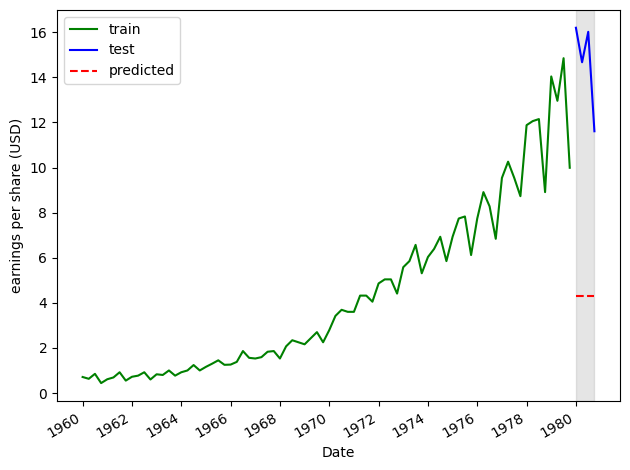

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train["date"], train["data"], "g-", label = "train")
ax.plot(test["date"], test["data"], "b-", label = "test")
ax.plot(test["date"], test["pred_mean"], "r--", label = "predicted")
ax.set_xlabel("Date")
ax.set_ylabel("earnings per share (USD)")
ax.axvspan(80, 83, color = "#808080", alpha = 0.2) # axvspan(xmin, xmax): axis vertical span　指定範囲を塗りつぶす
ax.legend(loc = 2)
plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)
fig.autofmt_xdate() # 時系列メモリの自動調整
plt.tight_layout()

In [14]:
last_year_mean = np.mean(train["data"][-4:])
print(last_year_mean)

12.96


In [15]:
test["pred_last_yr_mean"] = last_year_mean
mape(test["data"], test["pred_last_yr_mean"])

/tmp/ipykernel_19409/3185150299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_last_yr_mean"] = last_year_mean


np.float64(15.5963680725103)

In [16]:
train["data"][-4:]

76    14.04
77    12.96
78    14.85
79     9.99
Name: data, dtype: float64

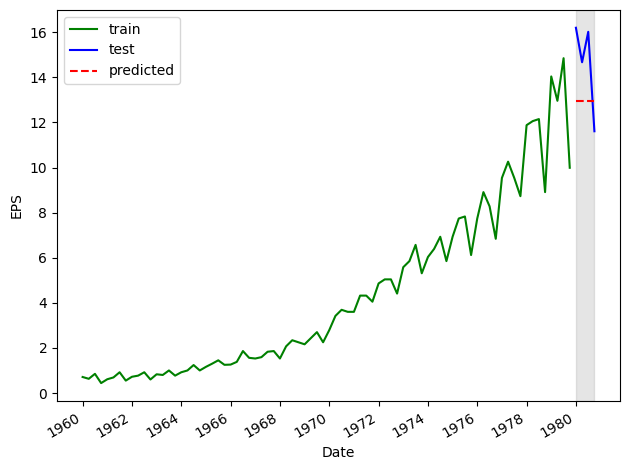

In [17]:
fig, ax = plt.subplots()
ax.plot(train["date"], train["data"], "g-", label = "train")
ax.plot(test["date"], test["data"], "b-", label = "test")
ax.plot(test["date"], test["pred_last_yr_mean"], "r--", label = "predicted")
ax.axvspan(80, 83, color = "#808080", alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel("EPS")
ax.legend(loc = 2)
ax.set_xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)
fig.autofmt_xdate()
fig.tight_layout()